# Radial Basis Functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import  KMeans
from sklearn.metrics import mean_squared_error

## Synthetic Data

In [146]:
x = np.linspace(-3,3,100)
y = -x**2 + 5

x_dist = np.asarray([np.asarray([np.random.normal(i,0.1) for j in range(100)]) for i in x])

y_dist = np.asarray([np.asarray([np.random.normal(i,1) for j in range(100)]) for i in y])
y_flat = y_dist.flatten()
x_flat = x_dist.flatten()

data = np.array([x_flat, y_flat]).T

## Plot

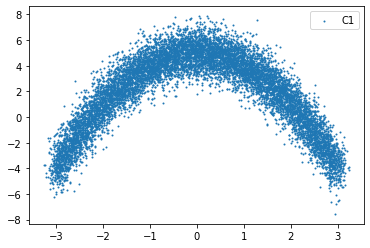

In [148]:
plt.scatter(data[:,0], data[:,1], s = 1, label = "C1")

plt.legend()

## RBF

In [150]:
X = data[:,0].reshape(-1, 1)
y = data[:,1].reshape(-1, 1)

In [151]:
from sklearn.model_selection import train_test_split


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [136]:
def gaussian(x, u, sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma)) #u is the center of the basis function (the mean of the gaussian)

In [137]:
def improved_model(X_train, y_train, X_test, y_test, plot = False):
    M = 200

    kmeans = KMeans(M)
    kmeans.fit(X_train)
    C = kmeans.cluster_centers_
    
    #sigma average
    sigma = 0
    for i in range(100):
        x1 = X_train[np.floor(np.random.rand()*X_train.shape[0]).astype(int)] #random number within the dataset
        x2 = X_train[np.floor(np.random.rand()*X_train.shape[0]).astype(int)]
        sigma += np.linalg.norm(x1-x2)
    sigma = sigma / 100
    
    U = np.zeros([X_train.shape[0], M])
    Utest = np.zeros([X_test.shape[0], M])
    
    for i in range(len(X_train)):
        for j in range(M):
            U[i,j] = gaussian(X_train[i], C[j], sigma)
            
    for i in range(len(X_test)):
        for j in range(M):
            Utest[i,j] = gaussian(X_test[i], C[j], sigma)
    
    l = np.linalg.inv(U.T @ U) @ U.T @ y_train
    yh = Utest @ l
    yh_train = U @ l
    


    if plot == True:
        fig, ax = plt.subplots(figsize=(3,3))
        ax.scatter(y_test, yh, c="m", s=3, label = "Testing data")
        ax.scatter(y_train, yh_train, c="c", s=3, label =  "Training data")

        ax.set_ylim(-2, 2)
        ax.set_xlim(-2, 2)
    

        ax.set_xlabel("True Target", fontsize=12)
        ax.set_ylabel("Prediction", fontsize=12)
        plt.legend()

    
    return(X_test, X_train, y_test, y_train, yh, yh_train)

In [145]:
X_test, X_train, y_test, y_train, yh, yh_train = improved_model(X_train, y_train, X_test, y_test,False)

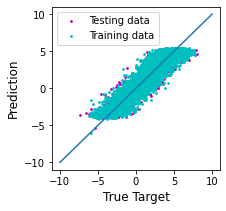

In [142]:
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y_test, yh, c="m", s=3, label = "Testing data")
ax.scatter(y_train, yh_train, c="c", s=3, label =  "Training data")
plt.plot(np.linspace(-10,10,10), np.linspace(-10,10,10))
# ax.set_ylim(-2, 2)
# ax.set_xlim(-2, 2)


ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)
plt.legend()


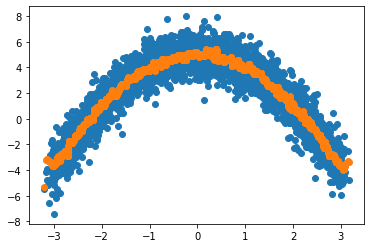

In [144]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,yh)